<h1 align="center"> Health Care Cost Prediction </h1>

In [36]:
import numpy as np
import pandas as pd

#plotly packages
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns

#Statistical libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

<h2> 2. Data </h2>

In [37]:
medical = pd.read_csv("insurance.csv")
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2> 3. Data Overview </h2>

In [38]:
print("Rows : ",medical.shape[0])
print("Columns : ", medical.shape[1])
print("\nMissing values : ", medical.isnull().sum().values.sum())
print("\nUnique values : \n",medical.nunique())

Rows :  1338
Columns :  7

Missing values :  0

Unique values : 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


<h2> 4. Exploratory Data Analysis </h2>

### 4.1 Distribution of age, bmi, children, charges

In [39]:
# function to plot histogram for a given column
def hist_plot(column,norm):
    
    trace = go.Histogram(x=medical[column],
                         histnorm = norm,
                         name = column,
                         marker = dict(line = dict(color="black", width=0.5)),
                         opacity = 0.9
                        )
    return trace

#subplots
fig = tls.make_subplots(rows=2, cols=2, subplot_titles = ('Age Distribution',
                                                                          'BMI Distribution',
                                                                           'Children Distribution',
                                                                            'Charges Distribution'
                                                                             )
                            )
                    
fig.append_trace(hist_plot("age",''),1,1)
fig.append_trace(hist_plot("bmi",''),1,2)
fig.append_trace(hist_plot("children",''),2,1)
fig.append_trace(hist_plot("charges",''),2,2)

fig["layout"].update(showlegend=False,
                         autosize = False,height = 1200,width = 1000,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
                                               
fig["layout"]["xaxis1"].update(dict(title="Age"))
fig["layout"]["yaxis1"].update(dict(title="Count"))
fig["layout"]["xaxis2"].update(dict(title="BMI"))
fig["layout"]["yaxis2"].update(dict(title="Count"))
fig["layout"]["xaxis3"].update(dict(title="Children"))
fig["layout"]["yaxis3"].update(dict(title="Count"))
fig["layout"]["xaxis4"].update(dict(title="Health Care Cost"))
fig["layout"]["yaxis4"].update(dict(title="Count"))


py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



### 4.2 Distribution of sex, smoker and region

In [40]:
#function to plot bar graph 
def pie_plot(column,name):
    
    trace = go.Pie(labels=medical[column].value_counts().keys().tolist(),
                   values = medical[column].value_counts().values.tolist(),
                   hoverinfo = "label+value+name",
                   hole = 0.5,
                   name = name,
                   marker = dict(line=dict(color='white',width=1.5)))
    data = [trace]
    layout = go.Layout(dict(title = name+" distribution",
                            plot_bgcolor = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                           )
                      )
    fig = go.Figure(data= data, layout=layout)
    py.iplot(fig)
    
pie_plot("sex", 'Sex')
pie_plot("smoker", 'Smoker')
pie_plot("region", 'Region')


### 4.3 Age Analysis

In [41]:
#function to categorize age into young, middle aged, old
def age_category(df):
    if df['age'] >=18 and df['age'] <=35:
        return "Young"
    elif df['age'] >=36 and df['age'] <55:
        return "Middle aged"
    else :
        return "Old"
    

medical["age_cat"] = medical.apply(lambda medical:age_category(medical),axis=1)
pie_plot("age_cat","Age")


### 4.4 BMI Analysis with Age Category

In [42]:
young_bmi = medical[medical['age_cat']=="Young"]['bmi'].tolist()
middle_bmi = medical[medical['age_cat']=="Middle aged"]['bmi'].tolist()
old_bmi = medical[medical['age_cat']=="Old"]['bmi'].tolist()

#function to plot box plot
def box_plot(array,name):
    trace = go.Box(y=array,
                   name = name,
                   boxmean=True,
                   )
    return trace

trace1 = box_plot(young_bmi,"Young Adults")
trace2 = box_plot(middle_bmi, "Middle Age ")
trace3 = box_plot(old_bmi, "Old Age")

data = [trace1, trace2, trace3]
layout = go.Layout(dict(title="BMI Analysis with Age Category",
                        xaxis = dict(title="Age Category"),
                        yaxis = dict(title="Body Mass Index")))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 4.5 BMI Analysis with Smoker Category

In [43]:
smoker_bmi = medical[medical['smoker']=='yes']['bmi'].tolist()
nonsmoker_bmi = medical[medical['smoker']=='no']['bmi'].tolist()

trace1 = box_plot(smoker_bmi,"Smoker")
trace2 = box_plot(nonsmoker_bmi, "Non Smoker")
data = [trace1,trace2]

layout = go.Layout(dict(title="BMI Analysis with Smoker Category",
                        xaxis=dict(title="Smoker Category"),
                        yaxis=dict(title="Body Mass Index")))

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

### 4.6 Health Care Cost Analysis 


#### 4.6.1 Health Care Cost vs Age Category

In [44]:
cost_young = medical[medical['age_cat']=="Young"]['charges'].tolist()
cost_middle = medical[medical['age_cat']=="Middle aged"]['charges'].tolist()
cost_old = medical[medical['age_cat']=='Old']['charges'].tolist()

trace1 = box_plot(cost_young,"Young Adults")
trace2 = box_plot(cost_middle,"Middle Age")
trace3 = box_plot(cost_old,"Old Age")

data = [trace1,trace2,trace3]

layout = go.Layout(dict(title="Health Cost with Age Category",
                        yaxis=dict(title="Health Care Cost"),
                        xaxis = dict(title="Age Category"))
                  )
fig = go.Figure(data = data, layout=layout)
py.iplot(fig)

#### 4.6.2 Health Care Cost with Smoker Category

In [45]:
cost_smoker = medical[medical['smoker']=='yes']['charges'].tolist()
cost_nonsmoker = medical[medical['smoker']=='no']['charges'].tolist()

trace1 = box_plot(cost_smoker,"Smoker")
trace2 = box_plot(cost_nonsmoker,"Non Smoker")

layout = go.Layout(dict(title="Health Care Charges with Smoker Category",
                        xaxis = dict(title="Smoker Category"),
                        yaxis = dict(title="Health Care Cost")))

data = [trace1, trace2]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### 4.6.3 Health Care Cost for Male and Female

In [46]:
cost_male = medical[medical['sex']=='male']['charges'].tolist()
cost_female = medical[medical['sex']=='female']['charges'].tolist()

trace1 = box_plot(cost_male,"Male")
trace2 = box_plot(cost_female,"Female")

data = [trace1, trace2]

layout = go.Layout(dict(title="Health Care Charges for Male and Female",
                        xaxis = dict(title = "Sex Category"),
                        yaxis = dict(title = "Health Care Cost")
                       )
                  )
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### 4.6.4 Health Care Cost distribution for different regions

In [47]:
cost_northeast = medical[medical['region']=="northeast"]['charges']
cost_northwest = medical[medical['region']=="northwest"]['charges']
cost_southeast = medical[medical['region']=="southeast"]['charges']
cost_southwest = medical[medical['region']=="southwest"]['charges']

trace1 = box_plot(cost_northeast, "Northeast")
trace2 = box_plot(cost_northwest, "Northwest")
trace3 = box_plot(cost_southeast, "Southeast")
trace4 = box_plot(cost_southwest, "Southwest")

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(dict(title="Health Care Cost Distribution for different regions"),
                        xaxis = dict(title="Regions"),
                        yaxis = dict(title="Health Care Cost"))

fig = go.Figure(data = data, layout=layout)
py.iplot(fig)

# medical['region'].value_counts()

#### 4.6.5 Health Care Charges for different weight category and smoking status

In [48]:
#function to categorize bmi
def weight_cat(df):
    if df['bmi'] <18.5:
        return "Underweight"
    elif df['bmi'] >=18.5 and df['bmi'] <25:
        return "Normal"
    elif df['bmi'] >=25 and df['bmi'] <30:
        return "Overweight"
    elif df['bmi']>=30:
        return "Obese"
    
medical['weight_category'] = medical.apply(lambda medical:weight_cat(medical),axis=1)
medical.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_category
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Young,Overweight


In [49]:
smoker_ovrwght = medical[(medical['weight_category']=="Overweight") & (medical['smoker']=="yes")]['charges']
smoker_obese = medical[(medical['weight_category']=="Obese") & (medical['smoker']=="yes")]['charges']
smoker_undwght = medical[(medical['weight_category']=="Underweight") & (medical['smoker']=="yes")]['charges']
smoker_normal = medical[(medical['weight_category']=="Normal") & (medical['smoker']=="yes")]['charges']
nonsmoker_ovrwght = medical[(medical['weight_category']=="Overweight") & (medical['smoker']=="no")]['charges']
nonsmoker_obese = medical[(medical['weight_category']=="Obese") & (medical['smoker']=="no")]['charges']
nonsmoker_undwght =  medical[(medical['weight_category']=="Underweight") & (medical['smoker']=="no")]['charges']
nonsmoker_normal = medical[(medical['weight_category']=="Normal") & (medical['smoker']=="no")]['charges']

trace1 = box_plot(smoker_undwght,"Underweight Smoker")
trace2 = box_plot(nonsmoker_undwght, "Underweight Non Smoker")
trace3 = box_plot(smoker_normal, "Normal Smoker")
trace4 = box_plot(nonsmoker_normal, "Normal Non Smoker")
trace5 = box_plot(smoker_ovrwght, "Overweight Smoker")
trace6 = box_plot(nonsmoker_ovrwght, "Overweight Non Smoker")
trace7 = box_plot(smoker_obese, "Obese Smoker")
trace8 = box_plot(nonsmoker_obese, "Obese Non Smoker")

data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8]
layout = go.Layout(dict(title="Health Care Charges for different weight category and smoking status",
                        height = 900,
                        width = 1100,
                        xaxis = dict(title="Types"),
                        yaxis = dict(title="Health Care Cost")))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### 4.6.6 Health care cost vs Age for different weight group and smoker category

In [50]:
age_undwght_smoker = medical[(medical['weight_category']=="Underweight") & (medical['smoker']=='yes')].loc[:,["age","charges"]].reset_index(drop=True)
age_normal_smoker = medical[(medical['weight_category']=="Normal") & (medical['smoker']=='yes')].loc[:,["age","charges"]].reset_index(drop=True)
age_ovrwght_smoker = medical[(medical['weight_category']=="Overweight") & (medical['smoker']=='yes')].loc[:,["age","charges"]].reset_index(drop=True)
age_obese_smoker = medical[(medical['weight_category']=="Obese") & (medical['smoker']=='yes')].loc[:,["age","charges"]].reset_index(drop=True)
age_undwght_nonsmoker = medical[(medical['weight_category']=="Underweight") & (medical['smoker']=='no')].loc[:,["age","charges"]].reset_index(drop=True)
age_normal_nonsmoker = medical[(medical['weight_category']=="Normal") & (medical['smoker']=='no')].loc[:,["age","charges"]].reset_index(drop=True)
age_ovrwght_smoker = medical[(medical['weight_category']=="Overweight") & (medical['smoker']=='no')].loc[:,["age","charges"]].reset_index(drop=True)
age_obese_nonsmoker = medical[(medical['weight_category']=="Obese") & (medical['smoker']=='no')].loc[:,["age","charges"]].reset_index(drop=True)                               
                               
def scatter_plot(df,x,y,name):
    trace = go.Scatter(x = df[x].tolist(),
                       y = df[y].tolist(),
                       name = name,
                       mode = "markers",
                       marker = dict(line=dict(color='black'),
                                     symbol = 'diamond-dot',
                                     opacity = 0.9
                                     ))
    return trace

trace1 = scatter_plot(age_undwght_smoker,"age","charges","Underweight Smoker")
trace2 = scatter_plot(age_normal_smoker,"age","charges","Normal Smoker")
trace3 = scatter_plot(age_ovrwght_smoker,"age","charges","Overweight Smoker")
trace4 = scatter_plot(age_obese_smoker,"age","charges","Obese Smoker")
trace5 = scatter_plot(age_undwght_nonsmoker,"age","charges","Underweight Non Smoker")
trace6 = scatter_plot(age_normal_nonsmoker,"age","charges","Normal Non Smoker") 
trace7 = scatter_plot(age_ovrwght_smoker,"age","charges","Overweight Non Smoker")                               
trace8 = scatter_plot(age_obese_nonsmoker,"age","charges","Obese Non Smoker")   
                               
data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8]

layout = go.Layout(dict(title="Health Care Charges vs Age",
                        xaxis=dict(title="Age"),
                        yaxis=dict(title="Health Care Cost")))
fig = go.Figure(data=data,layout=layout)

py.iplot(fig)

### 4.7 Scatter plot for Age, Bmi, Children and Charges

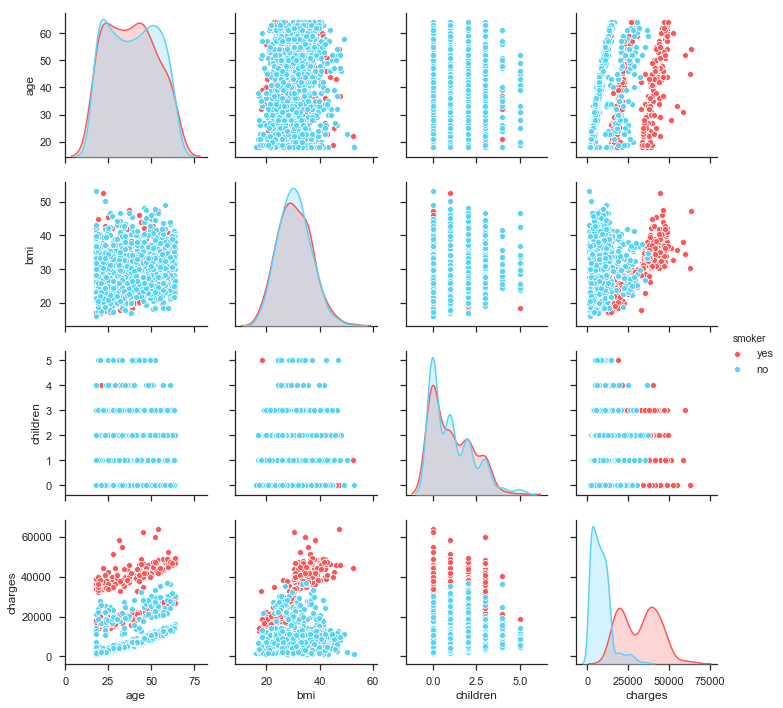

In [51]:
import seaborn as sns
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(medical, hue="smoker", palette=pal)


### 4.8 Correlation Matrix

In [52]:
correlation = medical.corr()
cols = correlation.columns.tolist()
array = np.array(correlation)

trace = go.Heatmap(z=array,
                   y=cols,
                   x=cols,
                   colorscale='Viridis',
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) 
                  )
layout = go.Layout(dict(title="Correlation Matrix",
                        autosize=False,
                        height=500,
                        width=500,
                       margin = dict(r=0,l=100,
                                     t=100, b=50)))
data=[trace]
fig = go.Figure(data = data, layout=layout)
py.iplot(fig)

### 5. Data Preprocessing

In [53]:
dataset = medical.copy()
dataset.head()

,age,sex,bmi,children,smoker,region,charges,age_cat,weight_category
0,19,female,27.900,0,yes,southwest,16884.92400,Young,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Young,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Young,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Young,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Young,Overweight


In [54]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#dropping columns age_cat and weight_category
dataset = dataset.drop(['age_cat','weight_category'],axis=1)

#label encoding for column sex and smoker to convert it into binary values
le = preprocessing.LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['smoker'] = le.fit_transform(dataset['smoker'])
dataset.head()

#one hot coding for column 'region'
dataset = pd.get_dummies(dataset,columns=['region'])

#separating training and test dataset
train, test = train_test_split(dataset,test_size=0.25,random_state=4)


target = ['charges']
cols = [col for col in dataset.columns if col not in target]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


#normalize training data set
x = train[cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
train[cols] = df

#normalize test data set
x = test[cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
test[cols] = df

### 6. Model Building

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from yellowbrick.regressor import ResidualsPlot

#list to store metrics value for each model
model_metrics = []

def model_fit(alg, train_X, train_Y, test_X, test_Y,alg_name):
    alg.fit(train_X,train_Y)
    predict_train = alg.predict(train_X)
    train_rmse = np.sqrt(mean_squared_error(train_Y[target].values,predict_train))
    print("Training data RMSE : ", train_rmse)
    predictions = alg.predict(test_X)
    test_rmse = np.sqrt(mean_squared_error(test_Y[target].values,predictions))
    print("Test data RMSE : ", test_rmse)
    test_mae = mean_absolute_error(test_Y[target].values,predictions)
    print("Test data MAE : ", test_mae)
    r2_score_train = r2_score(train_Y,predict_train)
    print("Training data R2 score : ", r2_score_train)
    r2_score_test = r2_score(test_Y, predictions)
    print("Test data R2 score : ", r2_score_test)
    
    return [alg_name,test_rmse, test_mae, r2_score_test]
    
    


#### 6.1 Linear Regression

Training data RMSE :  5901.431294030039
Test data RMSE :  6537.839296896744
Test data MAE :  4730.17783596947
Training data R2 score :  0.7636305775598812
Test data R2 score :  0.7034862956059015


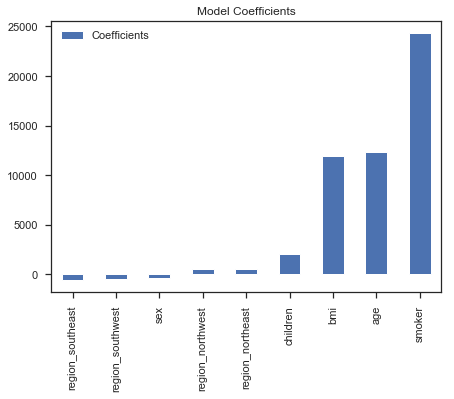

In [56]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline 

columns = [col for col in train.columns if col not in target]

reg = LinearRegression(normalize=True)
score_metrics = model_fit(reg,train[columns],train[target],test[columns],test[target],"Linear Regression")
model_metrics.append(score_metrics)
coef = pd.DataFrame(np.ravel(reg.coef_),columns)
coef.columns = ['Coefficients']
coef = coef.sort_values("Coefficients")
coef.plot(kind='bar', title='Model Coefficients',figsize=(7,5))

#### 6.2 Ridge Regression

Training data RMSE :  5982.728336100264
Test data RMSE :  6461.65551653731
Test data MAE :  4833.785254064239
Training data R2 score :  0.7570733568104168
Test data R2 score :  0.710356430784661


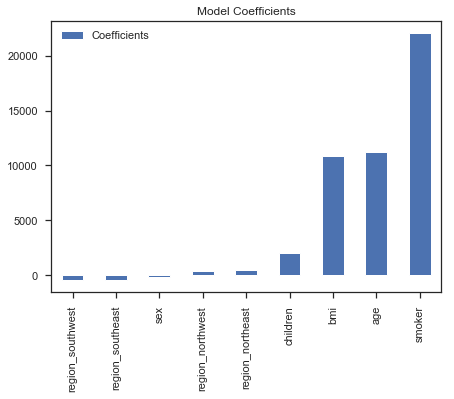

In [57]:
#Ridge model
from sklearn.linear_model import Ridge

columns = [col for col in train.columns if col not in target]

ridge = Ridge(alpha=0.1,normalize=True)
score_metrics = model_fit(ridge,train[columns],train[target],test[columns],test[target],"Ridge Regression")
model_metrics.append(score_metrics)
coef_ridge = pd.DataFrame(np.ravel(ridge.coef_),columns)
coef_ridge.columns = ['Coefficients']
coef_ridge = coef_ridge.sort_values("Coefficients")
coef_ridge.plot(kind='bar', title='Model Coefficients',figsize=(7,5))

#### 6.3 Decision Tree

Training data RMSE :  3988.5089192761225
Test data RMSE :  5884.8717583832495
Test data MAE :  3205.810499308368
Training data R2 score :  0.8920313382218099
Test data R2 score :  0.7597572477050242


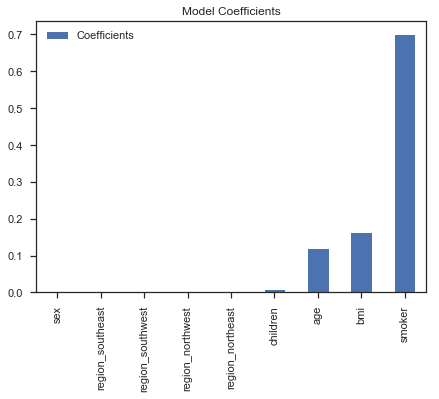

In [58]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

columns = [col for col in train.columns if col not in target]

dtree = DecisionTreeRegressor(max_depth=5,random_state=2)
score_metrics = model_fit(dtree,train[columns],train[target],test[columns],test[target],"Decision Tree")
model_metrics.append(score_metrics)
coef_tree = pd.DataFrame(np.ravel(dtree.feature_importances_),columns)
coef_tree.columns = ['Coefficients']
coef_tree = coef_tree.sort_values("Coefficients")
coef_tree.plot(kind='bar', title='Model Coefficients',figsize=(7,5))

#### 6.4 Random Forest

Training data RMSE :  3806.725326483328
Test data RMSE :  5822.864111388506
Test data MAE :  3225.501301135527
Training data R2 score :  0.9016487992736685
Test data R2 score :  0.7647933489865713


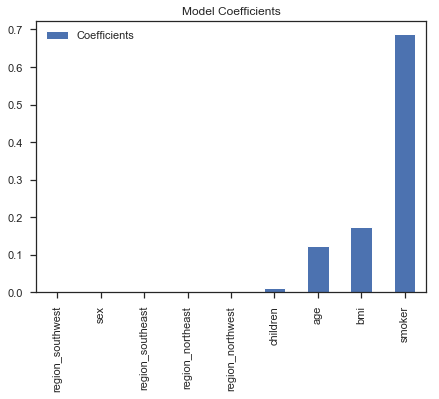

In [59]:
#random forest
from sklearn.ensemble import RandomForestRegressor

columns = [col for col in train.columns if col not in target]

forest = RandomForestRegressor(n_estimators=100,max_depth=5)
score_metrics = model_fit(forest,train[columns],train[target],test[columns],test[target],"Random Forest")
model_metrics.append(score_metrics)
coef_tree = pd.DataFrame(np.ravel(forest.feature_importances_),columns)
coef_tree.columns = ['Coefficients']
coef_tree = coef_tree.sort_values("Coefficients")
coef_tree.plot(kind='bar', title='Model Coefficients',figsize=(7,5))

#### 6.5 Gradient Boosting Regressor

Training data RMSE :  3923.302409209003
Test data RMSE :  5692.8405885573075
Test data MAE :  3128.434939009941
Training data R2 score :  0.8955327522097895
Test data R2 score :  0.7751803156150998


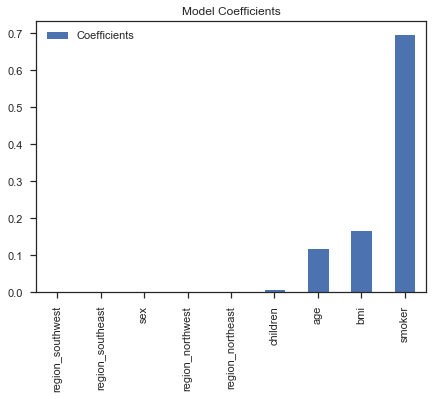

In [60]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

columns = [col for col in train.columns if col not in target]

GBR = GradientBoostingRegressor(n_estimators=100,learning_rate=0.05)
score_metrics = model_fit(GBR,train[columns],train[target],test[columns],test[target],"Gradient Boost")
model_metrics.append(score_metrics)
coef_tree = pd.DataFrame(np.ravel(GBR.feature_importances_),columns)
coef_tree.columns = ['Coefficients']
coef_tree = coef_tree.sort_values("Coefficients")
coef_tree.plot(kind='bar', title='Model Coefficients',figsize=(7,5))

### 7. Comapre Model metrics

In [61]:

#creating a dataframe for metrics comparision
score_df = pd.DataFrame(columns=['Model','RMSE','MAE','R2'])
for i, rows in enumerate(model_metrics):
    score_df.loc[i,:] = rows

#scaling up R2 score by 1000 for visualization
score_df['R2'] = 1000*score_df['R2']   

#function for bar plot of model metrics
def bar_plot_metrics(score_df,metric,color):
    trace = go.Bar(y=score_df["Model"],
                   x=score_df[metric],
                   orientation = 'h',
                   name = metric,
                   marker = dict(line = dict(width =1),
                                  color = color))
    return trace

layout = go.Layout(dict(title="Model Performances",
                        plot_bgcolor="rgb(243,243,243)",
                        paper_bgcolor ="rgb(243,243,243)",
                        showlegend=False,
                        height = 500,
                        
                        margin = dict(l=250)))

trace1 = bar_plot_metrics(score_df,"RMSE","orange")
trace2 = bar_plot_metrics(score_df,"MAE","green")
trace3= bar_plot_metrics(score_df,"R2", "grey")

data=[trace1,trace2,trace3]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)